In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

### 데이터 불러오기

In [2]:
with open('./원본데이터/2022_12.txt', 'r', encoding='utf-8') as f:
    content = f.read()

In [3]:
filtered_content = content.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','').replace('\n','')

### 한국어

In [4]:
import konlpy
Okt = konlpy.tag.Okt()
Okt_morphs = Okt.pos(filtered_content)  # 튜플반환

In [5]:
kor = []
for word, pos in Okt_morphs:
    if pos == 'Noun':
        kor.append(word)

In [6]:
kor_stopwords = []
kor_total = []

for i in kor:
    if i not in kor_stopwords:
        kor_total.append(i)

In [7]:
from wordcloud import WordCloud
from collections import Counter

kor_count = Counter(kor_total)
kor_final = kor_count.most_common(1000)

kor_final

[('한국', 1984),
 ('것', 1027),
 ('그', 758),
 ('수', 722),
 ('이', 683),
 ('말', 413),
 ('세계', 362),
 ('문화', 347),
 ('드라마', 339),
 ('경기', 338),
 ('위', 330),
 ('전', 327),
 ('월드컵', 314),
 ('브라질', 310),
 ('영화', 297),
 ('의', 287),
 ('우리', 284),
 ('감독', 284),
 ('중', 276),
 ('등', 274),
 ('사람', 264),
 ('대한', 261),
 ('위해', 258),
 ('선수', 258),
 ('가장', 252),
 ('그룹', 251),
 ('더', 244),
 ('팬', 235),
 ('팀', 231),
 ('팝', 222),
 ('시작', 220),
 ('핑크', 211),
 ('태국', 207),
 ('방탄소년단', 202),
 ('블랙', 198),
 ('자신', 195),
 ('다른', 193),
 ('고', 181),
 ('개', 179),
 ('행사', 178),
 ('이번', 177),
 ('일본', 176),
 ('멤버', 173),
 ('두', 170),
 ('명', 169),
 ('강', 159),
 ('로', 157),
 ('때', 154),
 ('문화원', 153),
 ('모든', 152),
 ('인기', 151),
 ('통해', 150),
 ('후', 149),
 ('포르투갈', 149),
 ('및', 149),
 ('은', 148),
 ('함', 148),
 ('명의', 147),
 ('음악', 147),
 ('케이팝', 146),
 ('대해', 145),
 ('진출', 145),
 ('때문', 144),
 ('동안', 144),
 ('골', 142),
 ('관광', 141),
 ('진', 136),
 ('세', 135),
 ('시간', 134),
 ('아시아', 133),
 ('이야기', 131),
 ('하나', 131),
 ('지난'

### 영어

In [8]:
eng_text = filtered_content.encode('utf-8').decode('ascii', 'ignore')
eng_text = re.sub('[^a-zA-Z ]', '', eng_text).strip()

In [9]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")
eng = tokenizer.tokenize(eng_text)

In [10]:
eng_stopwords = []
eng_total = []

for i in eng:
    if i not in eng_stopwords:
        eng_total.append(i)

In [11]:
eng_count = Counter(eng_total)
eng_final = eng_count.most_common(500)

eng_final

[('BTS', 178),
 ('FIFA', 80),
 ('The', 79),
 ('the', 75),
 ('Kpop', 68),
 ('Korean', 60),
 ('Korea', 51),
 ('Kore', 49),
 ('and', 42),
 ('Gney', 42),
 ('South', 39),
 ('KPop', 29),
 ('KPOP', 29),
 ('NCT', 28),
 ('for', 26),
 ('World', 25),
 ('with', 22),
 ('That', 20),
 ('Times', 18),
 ('Kim', 18),
 ('Cup', 17),
 ('Dnya', 16),
 ('Koreli', 16),
 ('Blackpink', 15),
 ('Indigo', 15),
 ('that', 15),
 ('SNS', 15),
 ('India', 15),
 ('Brazil', 15),
 ('Awards', 14),
 ('MAMA', 14),
 ('Yet', 14),
 ('IVE', 14),
 ('Kdramas', 14),
 ('News', 14),
 ('Jin', 13),
 ('Pink', 13),
 ('Son', 13),
 ('Love', 13),
 ('Come', 13),
 ('Netflix', 12),
 ('Boy', 12),
 ('New', 12),
 ('OTT', 12),
 ('ITZY', 12),
 ('Paulo', 12),
 ('URCC', 12),
 ('All', 11),
 ('Best', 11),
 ('Business', 11),
 ('Chaby', 11),
 ('more', 11),
 ('Coreia', 11),
 ('IMDb', 11),
 ('military', 10),
 ('Cho', 10),
 ('son', 10),
 ('are', 9),
 ('Dreamers', 9),
 ('You', 9),
 ('AFC', 9),
 ('Astronaut', 9),
 ('Life', 9),
 ('Doktoru', 9),
 ('Brezilya', 9),


### 한국어 + 영어

In [12]:
kor_df = pd.DataFrame(kor_final, columns = ['word', 'count'])
eng_df = pd.DataFrame(eng_final, columns = ['word', 'count'])

In [13]:
final = pd.concat([kor_df, eng_df], axis=0)
final = final.sort_values('count', ascending=False)
final = final.reset_index(drop=True)
final

,word,count
0,한국,1984
1,것,1027
2,그,758
3,수,722
4,이,683
...,...,...
1495,members,2
1496,IVIX,2
1497,What,2
1498,week,2


### 합치기 예시) K팝(105) + 케이팝(47) + Kpop(24) + KPop(26) + KPOP(12)

In [14]:
# s = 105 + 47 + 24 + 26 + 12
# final.loc[final['word'] == '팝', 'word'] = 'K팝'
# final.loc[final['word'] == 'K팝', 'count'] = s
# final = final.drop(index=final.loc[final.word == '케이팝'].index)
# final = final.drop(index=final.loc[final.word == 'Kpop'].index)
# final = final.drop(index=final.loc[final.word == 'KPop'].index)
# final = final.drop(index=final.loc[final.word == 'KPOP'].index)
# final.reset_index(drop=True, inplace=True)

### 최종 워드클라우드

In [15]:
final = final.sort_values('count', ascending=False)
final = final.reset_index(drop=True)
final = final.head(200)
final

,word,count
0,한국,1984
1,것,1027
2,그,758
3,수,722
4,이,683
...,...,...
195,결정,63
196,달,63
197,손흥민,63
198,한류,63


In [16]:
final.to_csv('./2022_12_count.csv', index=False, encoding='cp949')

In [17]:
final_dict = final.set_index('word').to_dict()['count']
final_dict

{'한국': 1984,
 '것': 1027,
 '그': 758,
 '수': 722,
 '이': 683,
 '말': 413,
 '세계': 362,
 '문화': 347,
 '드라마': 339,
 '경기': 338,
 '위': 330,
 '전': 327,
 '월드컵': 314,
 '브라질': 310,
 '영화': 297,
 '의': 287,
 '우리': 284,
 '감독': 284,
 '중': 276,
 '등': 274,
 '사람': 264,
 '대한': 261,
 '위해': 258,
 '선수': 258,
 '가장': 252,
 '그룹': 251,
 '더': 244,
 '팬': 235,
 '팀': 231,
 '팝': 222,
 '시작': 220,
 '핑크': 211,
 '태국': 207,
 '방탄소년단': 202,
 '블랙': 198,
 '자신': 195,
 '다른': 193,
 '고': 181,
 '개': 179,
 'BTS': 178,
 '행사': 178,
 '이번': 177,
 '일본': 176,
 '멤버': 173,
 '두': 170,
 '명': 169,
 '강': 159,
 '로': 157,
 '때': 154,
 '문화원': 153,
 '모든': 152,
 '인기': 151,
 '통해': 150,
 '포르투갈': 149,
 '후': 149,
 '및': 149,
 '은': 148,
 '함': 148,
 '음악': 147,
 '명의': 147,
 '케이팝': 146,
 '대해': 145,
 '진출': 145,
 '때문': 144,
 '동안': 144,
 '골': 142,
 '관광': 141,
 '진': 136,
 '세': 135,
 '시간': 134,
 '아시아': 133,
 '이야기': 131,
 '하나': 131,
 '지난': 130,
 '작품': 130,
 '공연': 130,
 '축구': 129,
 '최고': 129,
 '개최': 128,
 '예정': 125,
 '매우': 124,
 '또한': 123,
 '점': 122,
 '첫': 121,
 '국제': 

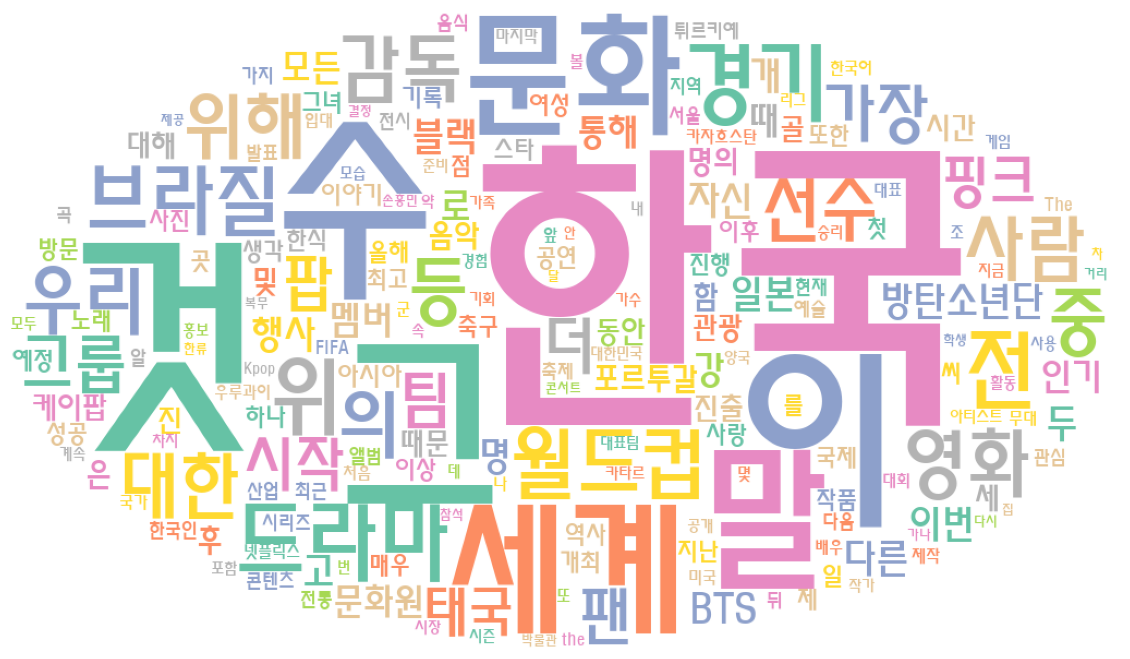

In [18]:
##원 모양으로 워드클라우드

from PIL import Image
import numpy as np
from wordcloud import WordCloud
from collections import Counter

count = Counter(final_dict)
word = count.most_common(200)

im = Image.open('mask.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

sns.set_style('white')
font_path = 'C:\Windows\Fonts\HMFMMUEX.TTC'

#prefer_horizontal=Ture -> 글씨 똑바르게 나오게 하기
wc = WordCloud(font_path=font_path, background_color='white', colormap='Set2',width=2000, height=1000, mask=mask_arr,prefer_horizontal=True).generate_from_frequencies(final_dict)

plt.figure(figsize = (20, 20))  
plt.imshow(wc)
wc.to_file('2022_12.png')
plt.axis('off')
plt.show()